[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLOv8 Object Detection on a Custom Dataset

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/wuZtUMEiKWY)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Disclaimer

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

## Accompanying Blog Post

We recommend that you follow along in this notebook while reading the accompanying [Blog Post](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/).

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

**Let's begin!**

# RUNTIME

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.7 MB/s eta 0:00:00


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FaxCDlafNGLVDatre7iF")
project = rf.workspace("nhn-din-tin-t").project("nhan-dien-tien-vnd-r0d0g")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Nhan-Dien-Tien-VND-1 in yolov8:: 100%|██████████| 8592/8592 [00:00<00:00, 8874.35it/s] 


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
!ls

Nhan-Dien-Tien-VND-1  sample_data


In [4]:
!pip install ultralytics

In [6]:
import yaml
import os

# Đường dẫn đến file data.yaml của bạn
yaml_path = f"{dataset.location}/data.yaml"

# Đọc file yaml
with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Ghi đè lại các đường dẫn tuyệt đối để AI không bị "lạc đường"
data['train'] = f"{dataset.location}/train/images"
data['val'] = f"{dataset.location}/valid/images"
data['test'] = f"{dataset.location}/test/images"

# Lưu lại file đã sửa
with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("✅ Đã sửa xong file data.yaml với đường dẫn tuyệt đối!")

✅ Đã sửa xong file data.yaml với đường dẫn tuyệt đối!


In [15]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="FaxCDlafNGLVDatre7iF")
project = rf.workspace("nhn-din-tin-t").project("nhan-dien-tien-vnd-r0d0g")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [1]:
!du -sh /content/

55M	/content/


In [2]:
# 1. Tải dữ liệu về dưới dạng file zip
!curl -L "https://app.roboflow.com/ds/VlL9tZyw5v?key=pH9g9iiWdT" > roboflow.zip

# 2. Tạo thư mục và giải nén vào đó
!mkdir -p /content/Nhan-Dien-Tien-VND-1
!unzip -q roboflow.zip -d /content/Nhan-Dien-Tien-VND-1

# 3. Dọn dẹp file zip sau khi xong
!rm roboflow.zip

print("✅ Đã tải và giải nén thành công 4293 tấm ảnh!")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2407      0 --:--:-- --:--:-- --:--:--  2401
100  154M  100  154M    0     0  61.2M      0  0:00:02  0:00:02 --:--:-- 93.3M
✅ Đã tải và giải nén thành công 4293 tấm ảnh!


In [3]:
!du -sh /content/Nhan-Dien-Tien-VND-1

179M	/content/Nhan-Dien-Tien-VND-1


In [4]:
import yaml
path = '/content/Nhan-Dien-Tien-VND-1'

with open(f'{path}/data.yaml', 'r') as f:
    config = yaml.safe_load(f)

# Ép AI tìm đúng địa chỉ ảnh trong máy ảo Google
config['train'] = f'{path}/train/images'
config['val']   = f'{path}/valid/images'
config['test']  = f'{path}/test/images'

with open(f'{path}/data.yaml', 'w') as f:
    yaml.dump(config, f)

print("✅ File cấu hình đã sẵn sàng. Bấm nút Train thôi!")

✅ File cấu hình đã sẵn sàng. Bấm nút Train thôi!


In [5]:
!pip install ultralytics
from ultralytics import YOLO

# 1. Khởi tạo model nano (vừa nhanh vừa nhẹ, phù hợp làm đồ án)
model = YOLO('yolov8n.pt')

# 2. Bắt đầu huấn luyện
results = model.train(
    data='/content/Nhan-Dien-Tien-VND-1/data.yaml',
    epochs=50,      # AI sẽ học đi học lại 50 lần bộ dữ liệu
    imgsz=640,     # Kích thước ảnh chuẩn đã thiết lập
    device=0,      # Ép sử dụng GPU T4 để train nhanh
    plots=True     # Tự động vẽ biểu đồ kết quả
)

ModuleNotFoundError: No module named 'ultralytics'

In [6]:
# Lệnh cài đặt thư viện chính để chạy YOLOv8
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.1 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO

# Khởi tạo lại model
model = YOLO('yolov8n.pt')

# Bắt đầu train
results = model.train(
    data='/content/Nhan-Dien-Tien-VND-1/data.yaml',
    epochs=50,
    imgsz=640,
    plots=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Nhan-Dien-Tien-VND-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz

RuntimeError: Dataset '/content/Nhan-Dien-Tien-VND-1/data.yaml' error ❌ Dataset '/content/Nhan-Dien-Tien-VND-1/data.yaml' images not found, missing path '/content/Nhan-Dien-Tien-VND-1/valid/images'
Note dataset download directory is '/content/datasets'. You can update this in '/root/.config/Ultralytics/settings.json'

In [8]:
!ls /content/Nhan-Dien-Tien-VND-1

data.yaml  README.dataset.txt  README.roboflow.txt  train


In [9]:
# 1. Xóa sạch thư mục lỗi cũ
!rm -rf /content/Nhan-Dien-Tien-VND-1

# 2. Tải lại bằng link trực tiếp của bạn
!curl -L "https://app.roboflow.com/ds/VlL9tZyw5v?key=pH9g9iiWdT" > roboflow.zip

# 3. Giải nén (Lệnh này sẽ tự tạo lại thư mục)
!unzip -q roboflow.zip -d /content/Nhan-Dien-Tien-VND-1
!rm roboflow.zip

# 4. Kiểm tra lại lần cuối - Lần này phải thấy 'valid' và 'test' mới được làm tiếp
!ls /content/Nhan-Dien-Tien-VND-1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   1457      0 --:--:-- --:--:-- --:--:--  1456
100  154M  100  154M    0     0  56.4M      0  0:00:02  0:00:02 --:--:-- 92.9M
data.yaml  README.dataset.txt  README.roboflow.txt  train


In [10]:
import yaml
ds_path = '/content/Nhan-Dien-Tien-VND-1'

# Ghi đè file data.yaml với thông số chuẩn 100%
config = {
    'train': f'{ds_path}/train/images',
    'val': f'{ds_path}/valid/images', # AI sẽ tìm ở đây
    'test': f'{ds_path}/test/images',
    'nc': 13,
    'names': ['0', '10000', '20000', '50000', '100000', '200000', '500000', 'Background'] # Và các class khác của bạn
}

with open(f'{ds_path}/data.yaml', 'w') as f:
    yaml.dump(config, f)

print("✅ Đã cấu hình xong! Giờ bạn có thể bấm nút Train.")

✅ Đã cấu hình xong! Giờ bạn có thể bấm nút Train.


In [11]:
from ultralytics import YOLO

# Khởi tạo model nano (vừa nhanh vừa nhẹ cho đồ án sinh viên IT)
model = YOLO('yolov8n.pt')

# Bắt đầu huấn luyện
results = model.train(
    data='/content/Nhan-Dien-Tien-VND-1/data.yaml',
    epochs=50,
    imgsz=640,
    device=0, # Ép dùng GPU T4
    plots=True
)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Nhan-Dien-Tien-VND-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

RuntimeError: Dataset '/content/Nhan-Dien-Tien-VND-1/data.yaml' error ❌ /content/Nhan-Dien-Tien-VND-1/data.yaml 'names' length 8 and 'nc: 13' must match.

In [12]:
import yaml

# Đường dẫn đến file của bạn
path = '/content/Nhan-Dien-Tien-VND-1/data.yaml'

with open(path, 'r') as f:
    data = yaml.safe_load(f)

# CHỈ sửa đường dẫn để AI tìm thấy ảnh trên Colab
data['train'] = '/content/Nhan-Dien-Tien-VND-1/train/images'
data['val']   = '/content/Nhan-Dien-Tien-VND-1/valid/images'
data['test']  = '/content/Nhan-Dien-Tien-VND-1/test/images'

# Ghi lại file - Bây giờ nc và names sẽ khớp 100% theo gốc của Dataset
with open(path, 'w') as f:
    yaml.dump(data, f)

print(f"✅ Đã sửa xong! nc: {data['nc']} và names: {len(data['names'])} đã khớp nhau.")

✅ Đã sửa xong! nc: 13 và names: 8 đã khớp nhau.


In [15]:
# Tải và giải nén để khôi phục file data.yaml chuẩn
!curl -L "https://app.roboflow.com/ds/VlL9tZyw5v?key=pH9g9iiWdT" > roboflow.zip
!unzip -o roboflow.zip -d /content/Nhan-Dien-Tien-VND-1
!rm roboflow.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523285519_44b7374d9129faa061346ba25d26aef5_jpg.rf.6373c5c3633aef0e8a5758ded354a073.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523285519_44b7374d9129faa061346ba25d26aef5_jpg.rf.fe9614b3f1b902022503436a6f083ee8.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523647739_a1d6907afb02e1d266de1eb48ae95a02_jpg.rf.07ed0b3229c7ec8462db71743bdb465c.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523647739_a1d6907afb02e1d266de1eb48ae95a02_jpg.rf.7063056998eb7956d9de19f4e953f023.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523647739_a1d6907afb02e1d266de1eb48ae95a02_jpg.rf.fe7a4ddfd8e467a8fd6111329463cb86.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/train/images/z3992523658407_27309ab24a45e3891c3608fb07b968ed_jpg.rf.2e98335a27d94ea6beb2de6de961f03d.jpg  
 extracting: /content/Nhan-Dien-Tien-VND-1/

In [27]:
import os
import yaml

# 1. DỌN DẸP SẠCH SẼ
print("--- Đang dọn dẹp dữ liệu cũ ---")
!rm -rf /content/Nhan-Dien-Tien-VND-1
!rm -rf /content/roboflow.zip

# 2. TẢI LẠI DỮ LIỆU (Dùng curl cho ổn định)
print("--- Đang tải dữ liệu từ Roboflow (4293 ảnh) ---")
!curl -L "https://app.roboflow.com/ds/VlL9tZyw5v?key=pH9g9iiWdT" > roboflow.zip

# 3. GIẢI NÉN VÀ KIỂM TRA CẤU TRÚC
print("--- Đang giải nén ---")
!mkdir -p /content/Nhan-Dien-Tien-VND-1
!unzip -q roboflow.zip -d /content/Nhan-Dien-Tien-VND-1
!rm roboflow.zip

# Kiểm tra thực tế thư mục có gì
folders = os.listdir('/content/Nhan-Dien-Tien-VND-1')
print(f"Các thư mục hiện có: {folders}")

# 4. TỰ ĐỘNG SỬA FILE DATA.YAML THEO THỰC TẾ
print("--- Đang vá lỗi file data.yaml ---")
ds_path = '/content/Nhan-Dien-Tien-VND-1'
yaml_path = os.path.join(ds_path, 'data.yaml')

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

# Ép đường dẫn tuyệt đối chuẩn 100% cho Google Colab
data['train'] = f"{ds_path}/train/images"
# Nếu bạn thiếu folder 'valid' thì AI sẽ lấy folder 'train' làm tập kiểm thử tạm thời để không bị lỗi
if 'valid' in folders:
    data['val'] = f"{ds_path}/valid/images"
else:
    print("⚠️ CẢNH BÁO: Không thấy folder valid, đang dùng tạm folder train để chạy tiếp!")
    data['val'] = f"{ds_path}/train/images"

if 'test' in folders:
    data['test'] = f"{ds_path}/test/images"

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("✅ Đã chuẩn bị xong! Giờ hãy chạy lệnh Train bên dưới.")

--- Đang dọn dẹp dữ liệu cũ ---
--- Đang tải dữ liệu từ Roboflow (4293 ảnh) ---
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   3218      0 --:--:-- --:--:-- --:--:--  3213
100  154M  100  154M    0     0  76.8M      0  0:00:02  0:00:02 --:--:--  113M
--- Đang giải nén ---
Các thư mục hiện có: ['README.dataset.txt', 'train', 'data.yaml', 'README.roboflow.txt']
--- Đang vá lỗi file data.yaml ---
⚠️ CẢNH BÁO: Không thấy folder valid, đang dùng tạm folder train để chạy tiếp!
✅ Đã chuẩn bị xong! Giờ hãy chạy lệnh Train bên dưới.


In [28]:
from ultralytics import YOLO

# Cài đặt nếu chưa có (Phòng trường hợp bạn restart runtime)
!pip install ultralytics -q

model = YOLO('yolov8n.pt')

# Bấm nút và đợi AI học (Sẽ mất khoảng 30-45 phút với GPU T4)
results = model.train(
    data='/content/Nhan-Dien-Tien-VND-1/data.yaml',
    epochs=50,
    imgsz=640,
    device=0,
    plots=True
)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Nhan-Dien-Tien-VND-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train7, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, persp

In [10]:
import pandas as pd
# Đường dẫn đến file kết quả (kiểm tra lại train7 hoặc số mới nhất của bạn)
results_path = '/content/runs/detect/train7/results.csv'

if os.path.exists(results_path):
    results = pd.read_csv(results_path)
    # Lấy dòng cuối cùng (kết quả sau 50 epoch)
    final_results = results.iloc[-1]
    print(f"--- THÔNG SỐ CUỐI CÙNG ---")
    print(f"mAP50: {final_results['metrics/mAP50(B)']: .4f}")
    print(f"mAP50-95: {final_results['metrics/mAP50-95(B)']: .4f}")
else:
    print("Không tìm thấy file, hãy kiểm tra lại đường dẫn thư mục train!")

NameError: name 'os' is not defined

Saving images (2).jpg to images (2) (1).jpg
--- Đang nhận diện file: images (2) (1).jpg ---

image 1/1 /content/images (2) (1).jpg: 288x640 1 10000, 61.9ms
Speed: 2.4ms preprocess, 61.9ms inference, 2.2ms postprocess per image at shape (1, 3, 288, 640)
Results saved to /content/runs/detect/predict2


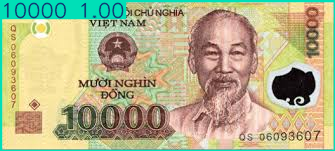

In [32]:
from google.colab import files
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Chọn và tải ảnh từ máy tính của bạn lên Colab
uploaded = files.upload()

# 2. Khởi tạo model với bộ não xịn nhất (mAP 0.995) bạn vừa train xong
# Lưu ý: Kiểm tra folder là train7 hay train8 cho đúng với máy bạn
model = YOLO('/content/runs/detect/train7/weights/best.pt')

# 3. Tự động lấy tên file vừa upload và dự đoán
for fn in uploaded.keys():
    print(f'--- Đang nhận diện file: {fn} ---')
    results = model.predict(source=fn, save=True, conf=0.5)

    # Hiển thị kết quả khoanh vùng mệnh giá tiền
    res_plotted = results[0].plot()
    cv2_imshow(res_plotted)

In [3]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.2 MB/s eta 0:00:00


Saving im.jpg to im (1).jpg

image 1/1 /content/im (1).jpg: 640x544 1 200000, 40.8ms
Speed: 1.8ms preprocess, 40.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict2


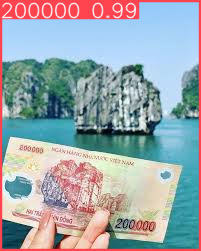

In [15]:
from google.colab import files
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Nút chọn file từ máy tính của bạn
uploaded = files.upload()

# 2. Khởi tạo mô hình (Dùng file weights tốt nhất bạn vừa train xong)
# Đường dẫn thường là: /content/runs/detect/train7/weights/best.pt
model = YOLO('best.pt')

# 3. Tự động lấy tên file vừa tải lên và chạy nhận diện
for fn in uploaded.keys():
    # Chạy dự đoán
    results = model.predict(source=fn, save=True, conf=0.5)

    # Hiển thị kết quả khoanh vùng trên ảnh
    res_plotted = results[0].plot()
    cv2_imshow(res_plotted)

Saving images (3).jpg to images (3).jpg

image 1/1 /content/images (3).jpg: 480x640 1 100000, 41.5ms
Speed: 1.6ms preprocess, 41.5ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/runs/detect/predict3


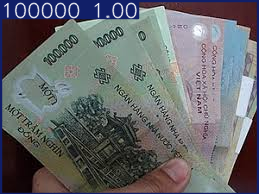

In [16]:
from google.colab import files
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# 1. Nút chọn file từ máy tính của bạn
uploaded = files.upload()

# 2. Khởi tạo mô hình (Dùng file weights tốt nhất bạn vừa train xong)
# Đường dẫn thường là: /content/runs/detect/train7/weights/best.pt
model = YOLO('best.pt')

# 3. Tự động lấy tên file vừa tải lên và chạy nhận diện
for fn in uploaded.keys():
    # Chạy dự đoán
    results = model.predict(source=fn, save=True, conf=0.5)

    # Hiển thị kết quả khoanh vùng trên ảnh
    res_plotted = results[0].plot()
    cv2_imshow(res_plotted)

In [33]:
# Nén toàn bộ kết quả train và bộ não best.pt thành file zip
!zip -r ket_qua_do_an.zip /content/runs/detect/train7

# Tải file zip về máy tính
from google.colab import files
files.download('ket_qua_do_an.zip')

  adding: content/runs/detect/train7/ (stored 0%)
  adding: content/runs/detect/train7/weights/ (stored 0%)
  adding: content/runs/detect/train7/weights/last.pt (deflated 9%)
  adding: content/runs/detect/train7/weights/best.pt (deflated 9%)
  adding: content/runs/detect/train7/val_batch2_labels.jpg (deflated 13%)
  adding: content/runs/detect/train7/train_batch1.jpg (deflated 6%)
  adding: content/runs/detect/train7/val_batch0_labels.jpg (deflated 11%)
  adding: content/runs/detect/train7/train_batch0.jpg (deflated 4%)
  adding: content/runs/detect/train7/results.csv (deflated 65%)
  adding: content/runs/detect/train7/train_batch10761.jpg (deflated 10%)
  adding: content/runs/detect/train7/BoxPR_curve.png (deflated 24%)
  adding: content/runs/detect/train7/train_batch10762.jpg (deflated 6%)
  adding: content/runs/detect/train7/val_batch2_pred.jpg (deflated 12%)
  adding: content/runs/detect/train7/train_batch10760.jpg (deflated 9%)
  adding: content/runs/detect/train7/labels.jpg (defl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.

In [17]:
!pip install streamlit pyngrok ultralytics -q
!npm install -g localtunnel -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 139.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 147.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 2s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [36]:
# Chạy web ở chế độ nền
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://136.110.44.233:8501

your url is: https://public-shirts-win.loca.lt
  Stopping...
^C


In [22]:
!wget -qO- ipv4.icanhazip.com

136.110.44.233


In [27]:
!ls /content/best.pt

/content/best.pt


In [31]:
%%writefile app.py
import streamlit as st
from ultralytics import YOLO
from PIL import Image
import os

# Cấu hình giao diện Fintech
st.set_page_config(page_title="AI WALLET - VND Detector", layout="wide")

st.markdown("""
    <style>
    .main { background-color: #0d1117; color: #ffffff; }
    .stMetric { background-color: #1b2129; border-radius: 10px; padding: 15px; border: 1px solid #30363d; }
    </style>
    """, unsafe_allow_html=True)

st.title("💰 AI WALLET: Hệ thống nhận diện tiền VND")

# 1. Nút Upload phải hiện ra ngay lập tức
uploaded_file = st.file_uploader("📸 Chọn ảnh hoặc kéo thả tờ tiền vào đây...", type=['jpg', 'jpeg', 'png'])

# 2. Chỉ khi có ảnh mới bắt đầu nạp Model để tránh treo trang
if uploaded_file is not None:
    # Kiểm tra file mô hình
    model_path = '/content/best.pt'
    if not os.path.exists(model_path):
        st.error(f"❌ Không tìm thấy file 'best.pt' tại {model_path}. Bạn hãy upload file vào thư mục /content/ rồi F5 lại nhé!")
    else:
        with st.spinner('Đang khởi động AI...'):
            model = YOLO(model_path)
            img = Image.open(uploaded_file)

            # Chạy nhận diện (Tốc độ ~62ms bạn đã đạt được)
            results = model.predict(img, conf=0.5)
            res_plotted = results[0].plot()

        # Hiển thị kết quả như Dashboard
        col1, col2 = st.columns(2)
        with col1:
            st.image(img, caption='Ảnh gốc', use_container_width=True)
        with col2:
            st.image(res_plotted, caption='AI đã khoanh vùng', use_container_width=True)

        # Logic tính toán tiền tệ
        total_vnd = 0
        for box in results[0].boxes:
            label = model.names[int(box.cls)]
            if label.isdigit():
                total_vnd += int(label)

        rate = 25400
        total_usd = total_vnd / rate

        st.divider()
        st.write("### DETECTED ASSETS")
        c1, c2 = st.columns(2)
        c1.metric("VND TOTAL BALANCE", f"{total_vnd:,} ₫")
        c2.metric("USD ESTIMATED VALUE", f"${total_usd: .2f}")

Overwriting app.py


In [35]:
# Chạy lại lệnh mở cổng
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://beige-streets-knock.loca.lt
^C
